<a href="https://colab.research.google.com/github/ajitjadhav10/Practicecodes/blob/main/Ajit_GD_part_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing the dataset

In [16]:
df_1=pd.read_csv('https://raw.githubusercontent.com/ajitjadhav10/Databases/main/slot_performance%20Table.csv')
df_1.head()

,employer_id,city_id,contract_id,start_date,end_date,renewed_flag,job_slots,total_contract_value,applications,apply_start_clicks,click_marketplace_value,job_listings
0,4277920,9767,2423796,30/10/2017,11/30/2017,1,15,995,215,255,15484.40,25
1,2372987,8585,2074128,29/06/2017,7/29/2017,0,50,1495,55,70,1719.30,50
2,1142693,6665,1924740,2/5/2017,6/2/2017,0,15,495,45,95,1195.75,20
3,1353893,5165,1942512,9/5/2017,6/6/2017,0,15,995,155,175,1197.35,20
4,922427,3882,1380984,19/09/2016,10/20/2016,1,15,745,150,185,8889.70,20


Storing the features in X and the target Y

In [17]:
X=df_1[['job_slots','total_contract_value','applications','apply_start_clicks','click_marketplace_value','job_listings']]
Y=df_1['renewed_flag']

Splitting the data into train and test data

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

Importing the Random Forest Classifier model and training the model on the training data

In [29]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=1000, max_depth=2)
clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)
Y_pred

array([1, 1, 1, ..., 1, 1, 1])

Finding the importance of different features of the dataset

In [20]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

click_marketplace_value    0.416867
apply_start_clicks         0.282023
applications               0.144240
total_contract_value       0.137745
job_listings               0.016295
job_slots                  0.002830
dtype: float64

Calculating the accuracy Score

In [32]:
from sklearn.metrics import accuracy_score
print("Accuracy score: ",accuracy_score(Y_test,Y_pred))

Accuracy score:  0.703566384180791


Using Gradient Boost Classifier model to check if there is an improvement in the accuracy of the model

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

clf_1=GradientBoostingClassifier(n_estimators=3000,max_depth=2)
clf_1=clf_1.fit(X_train,Y_train)

In [23]:
y_pred_1=clf_1.predict(X_test)
y_pred_1

array([1, 1, 1, ..., 1, 1, 1])

Calculating the accuracy score

In [24]:
from sklearn.metrics import accuracy_score
print("Accuracy score: ",accuracy_score(Y_test,y_pred_1))

Accuracy score:  0.7402895480225988


Finding the importance of different features of the dataset

In [25]:
feature_imp_1 = pd.Series(clf_1.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp_1

click_marketplace_value    0.709122
total_contract_value       0.162074
apply_start_clicks         0.055732
job_listings               0.041620
applications               0.028677
job_slots                  0.002776
dtype: float64

Plotting the feature importance

No handles with labels found to put in legend.


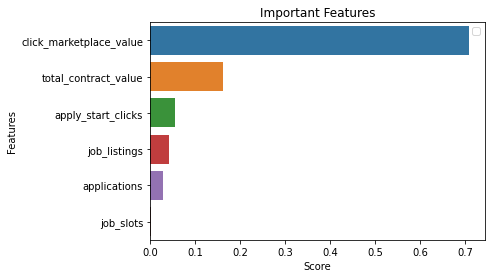

In [27]:
sns.barplot(x=feature_imp_1, y=feature_imp_1.index)
# Add labels to your graph
plt.xlabel('Score')
plt.ylabel('Features')
plt.title("Important Features")
plt.legend()
plt.show()